# Exercise 08 Clustering II - Solution

## Pedagogy

This notebook contains both theoretical explanations and executable cells to execute your code.

When you see the <span style="color:red">**[TBC]**</span> (To Be Completed) sign, it means that you need to perform an action else besides executing the cells of code that already exist. These actions can be:
- Complete the code with proper comments
- Respond to a question
- Write an analysis
- etc.

### Import libraries

In [1]:
# import all libraries used in this notebook here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from sklearn.preprocessing import MinMaxScaler

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

#import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
from plotly.subplots import make_subplots
pio.renderers.default = 'notebook'

## Part 2. Hierarchical clustering

This part we will perform clustering on a customer dataset provided by a mall. You can find the `Mall_Customers.csv` on the Learn platform. The goal is to obtain a hierarchy of clusters using agglomerative clustering algorithm.

### Load the dataset

Download the `Mall_Customers.csv` and load it.

In [2]:
# load dataset
df = pd.read_csv('Mall_Customers.csv')
df.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

### Data exploration

We won't repeat the data exploration step since we've already done that in the last session.
The exploration resluts indicate that:
- 'CustomerID' is a unique ID that is highly correlated to the annual income, we can keep the 'Annual Income' feature and set 'CustomerID' as index
- 'Gender' is a categorical feature, there is no significant difference between different genders regards the three features in the dataset, we can delete 'Gender' from the following analysis.

### Data pre-processing

In [3]:
# set 'CustomerID' as the index of the DataFrame
df.set_index(['CustomerID'], inplace = True)
df.head()

Gender  Age  Annual Income (k$)  Spending Score (1-100)
CustomerID                                                         
1             Male   19                  15                      39
2             Male   21                  15                      81
3           Female   20                  16                       6
4           Female   23                  16                      77
5           Female   31                  17                      40

In [4]:
# eliminate 'Gender' from the dataset
df.drop(columns = ['Gender'], inplace = True)
df.head()

Age  Annual Income (k$)  Spending Score (1-100)
CustomerID                                                 
1            19                  15                      39
2            21                  15                      81
3            20                  16                       6
4            23                  16                      77
5            31                  17                      40

### Create dendrorogram with different types of linkage

We will use `scipy` to create dendrorogram with different types of linkage.
- `scipy.cluster.hierarchy.linkage` for calculating different types of linkage.
- `scipy.cluster.hierarchy.dendrogram` for generating the dendrogram given a linkage.

In [5]:
# calculate the distance matrix using different linkage criteria
X = df.values
dm_single = linkage(X, method = 'single')
dm_complete = linkage(X, method = 'complete')
dm_average = linkage(X, method = 'average')
dm_ward = linkage(X, method = 'ward')

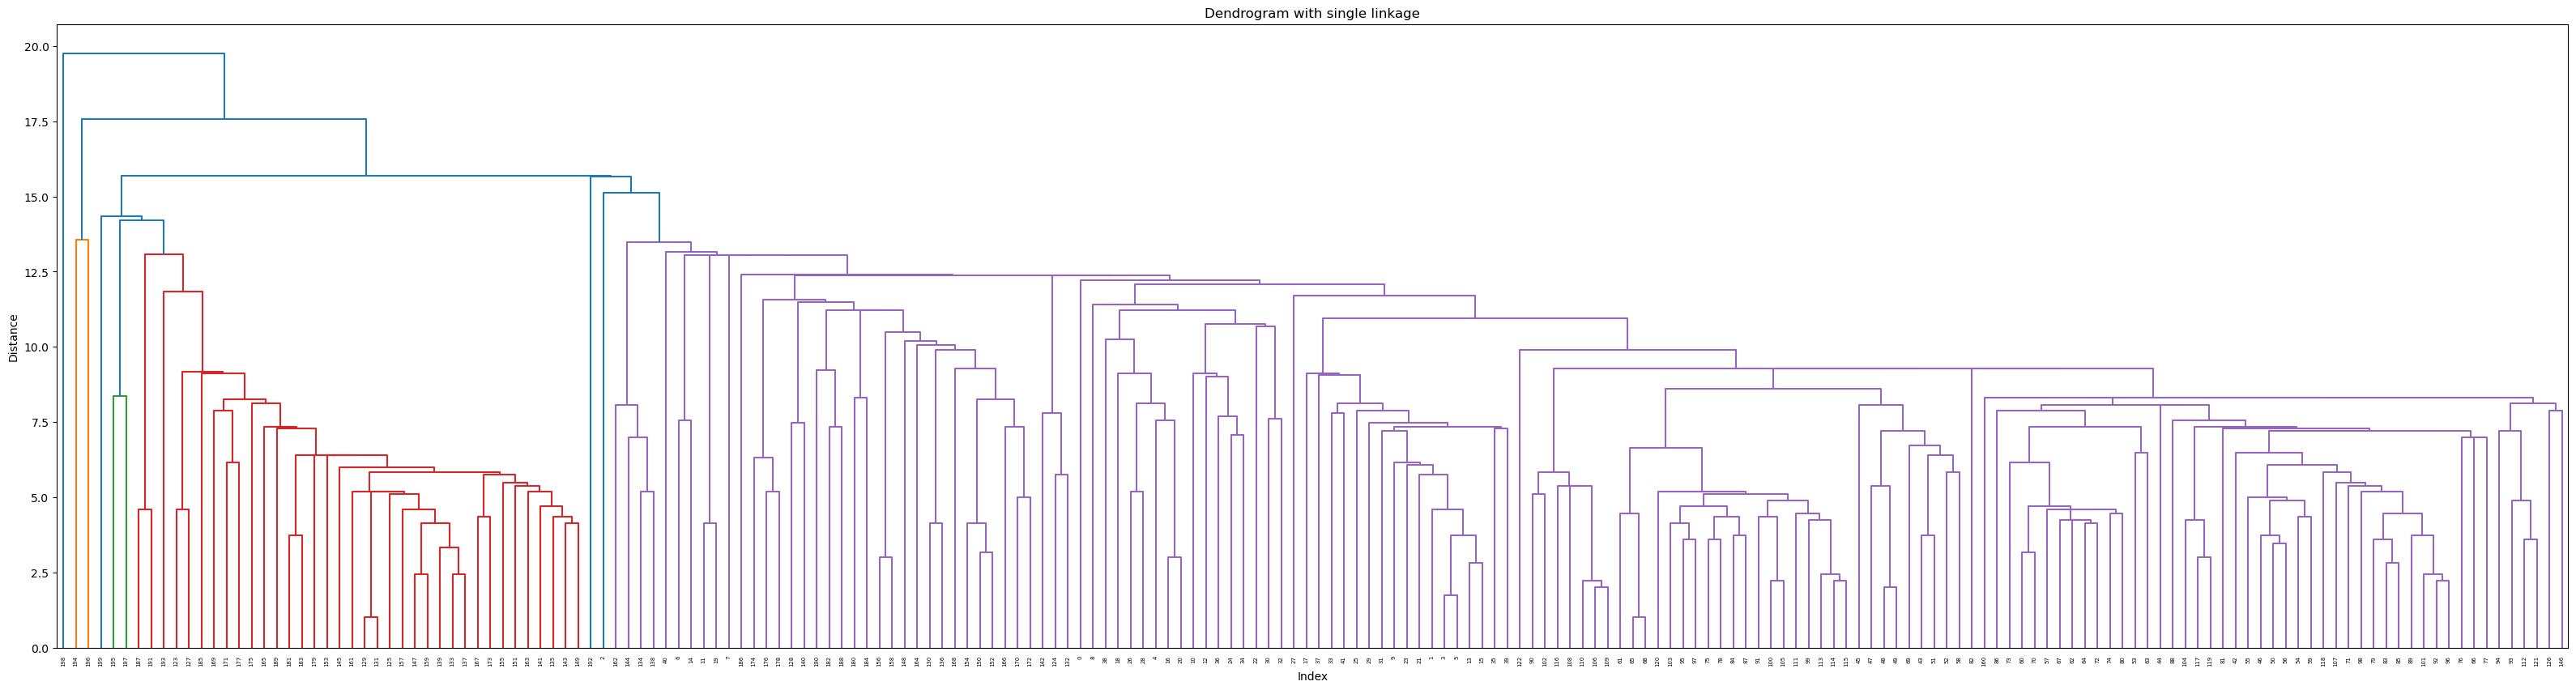

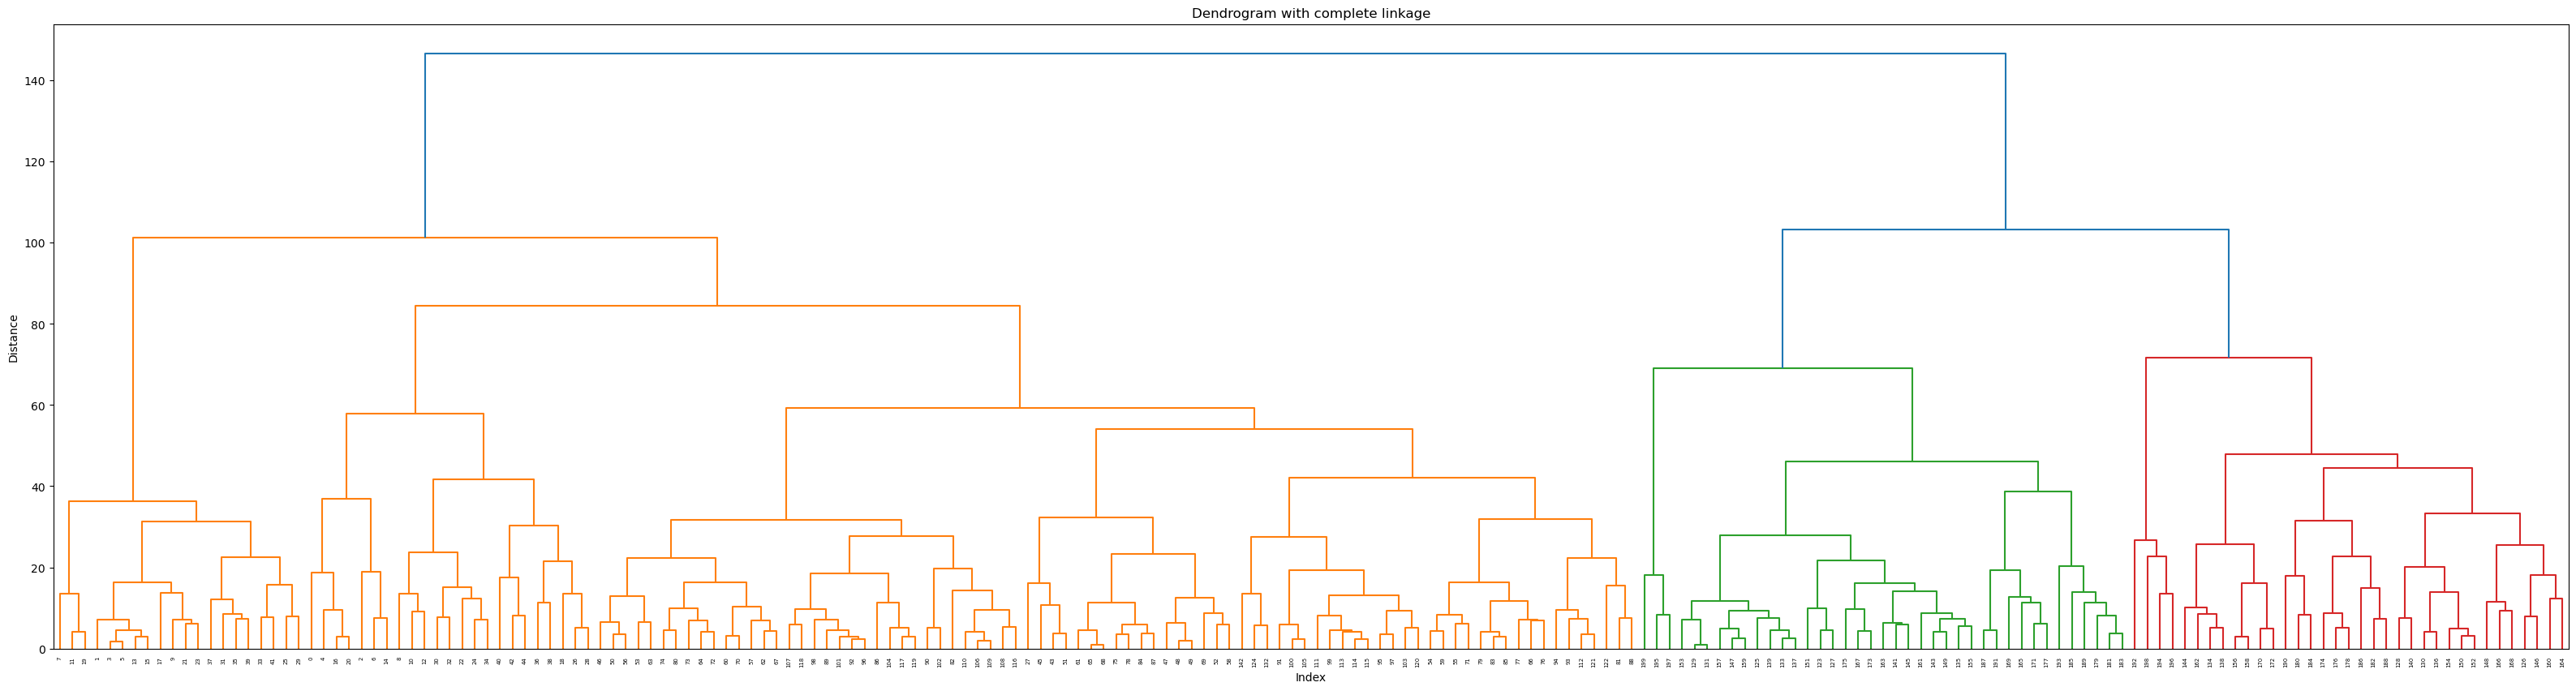

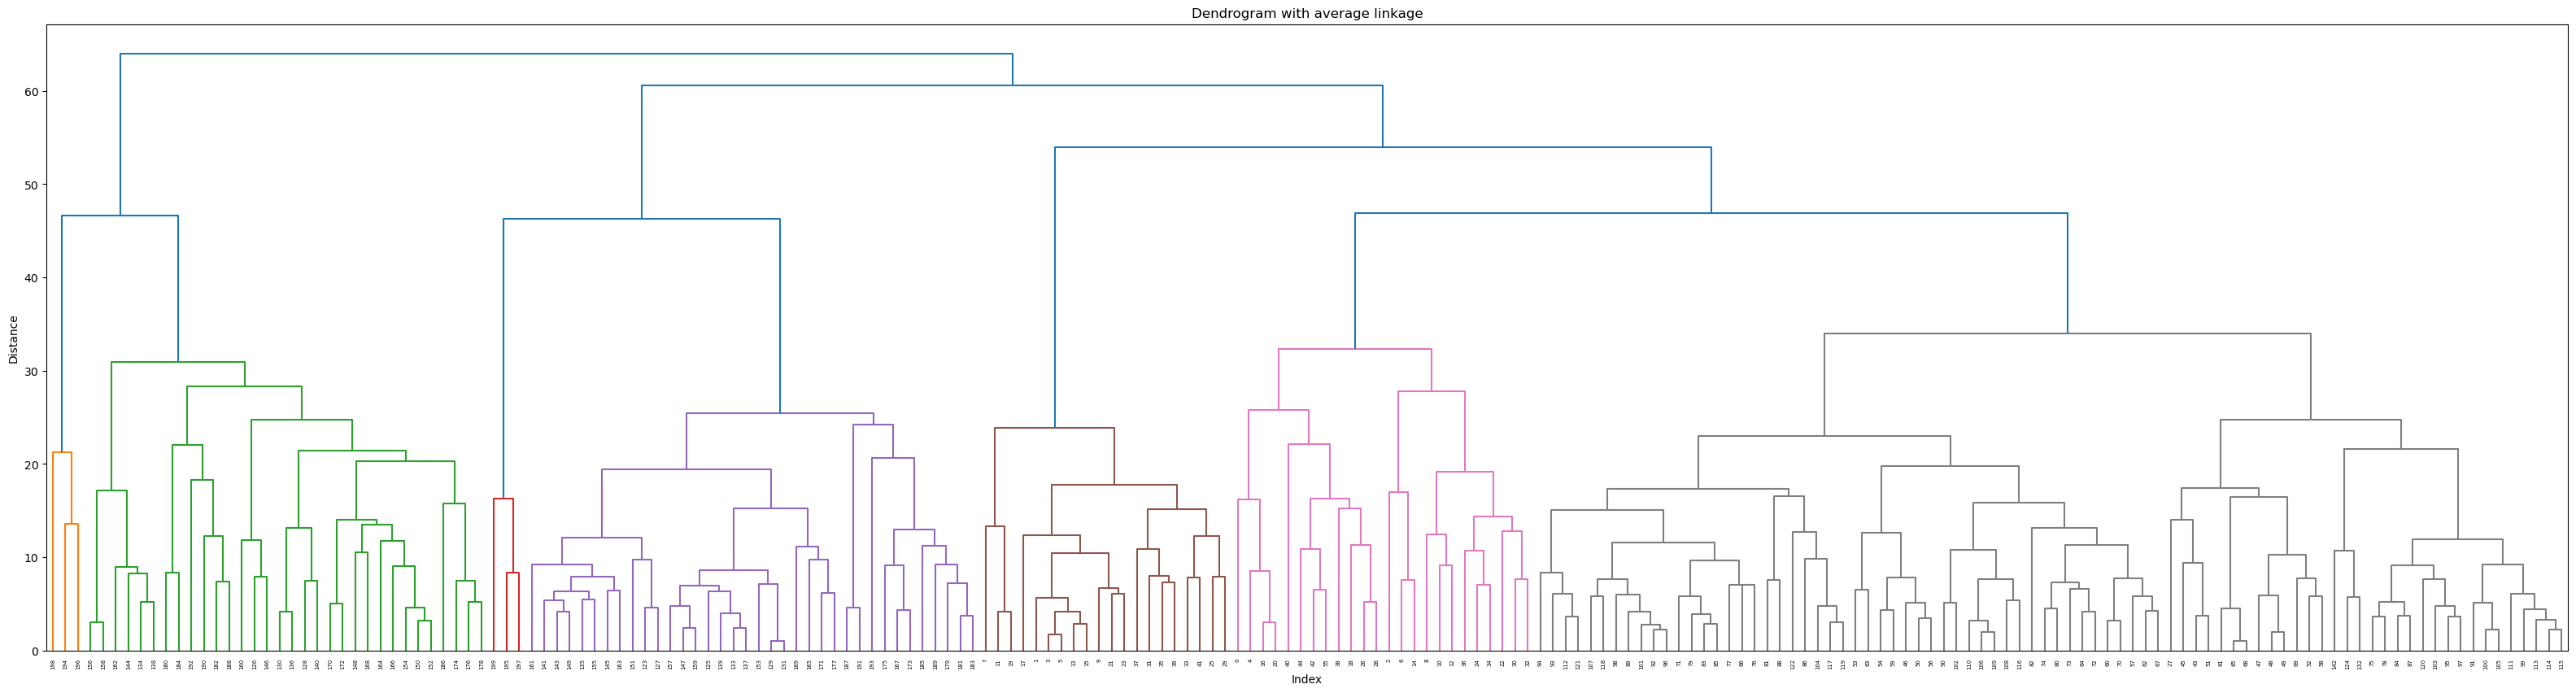

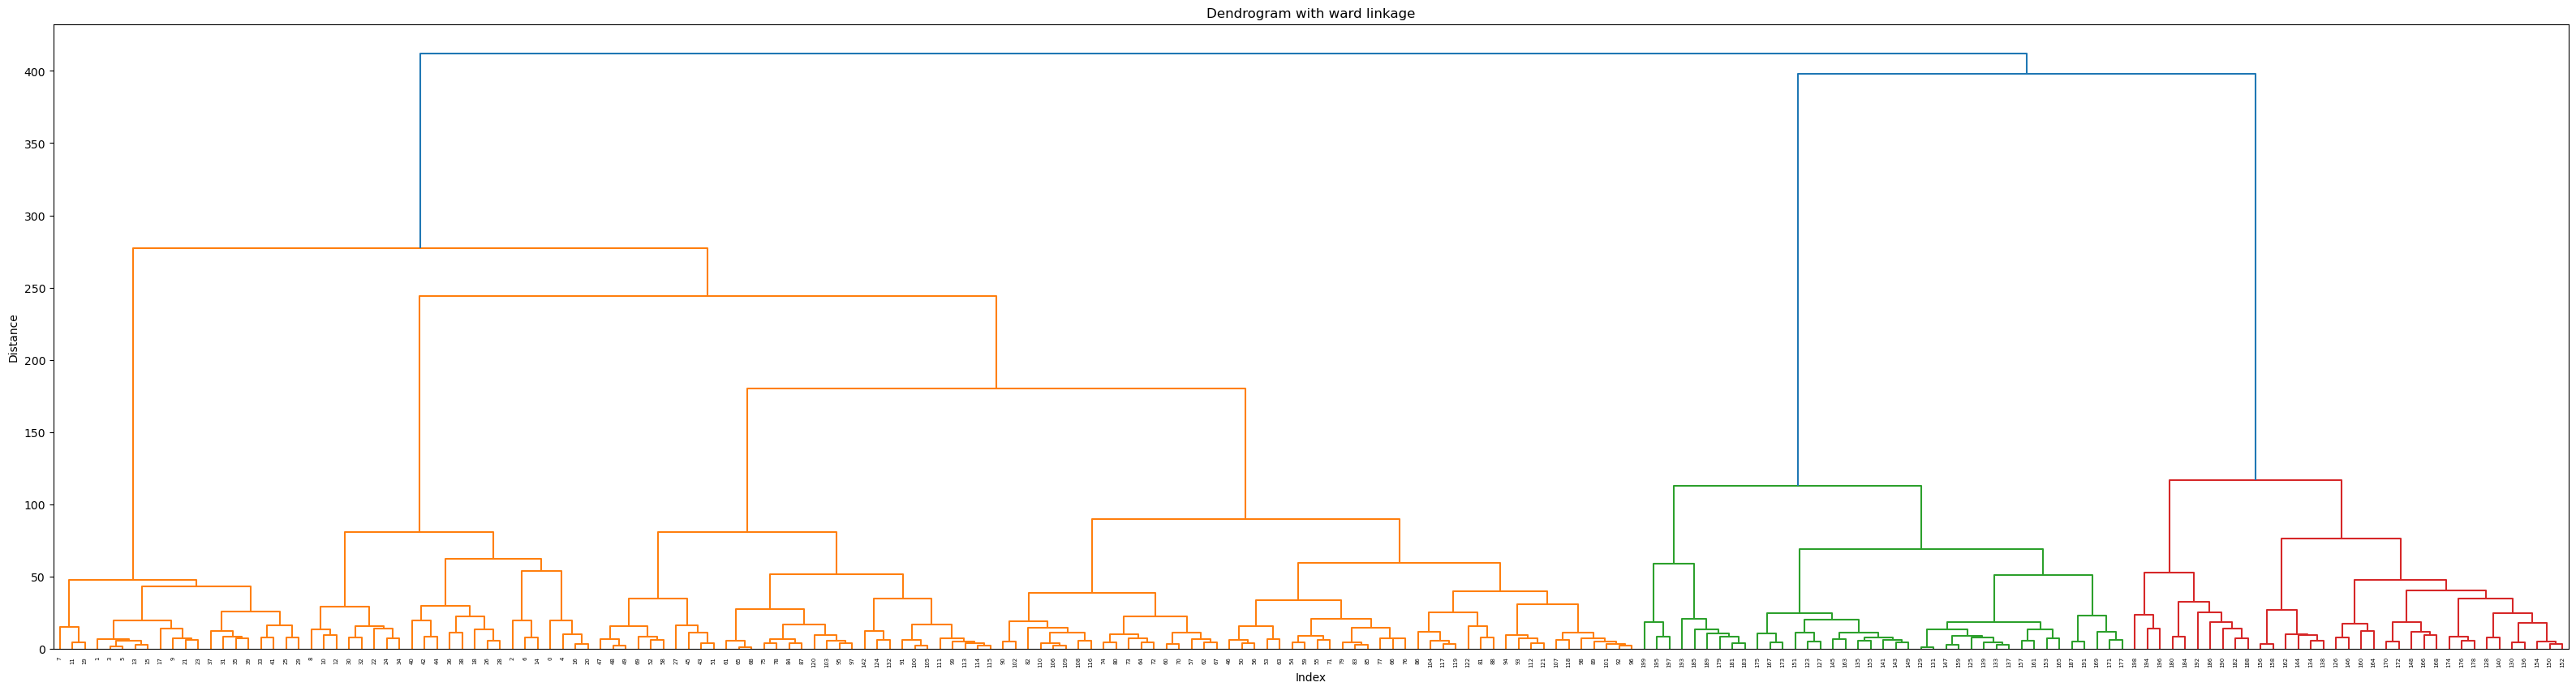

In [6]:
# full dendrogram with single linkage
plt.figure(figsize = (40, 10))
dendrogram(Z = dm_single)
plt.title('Dendrogram with single linkage')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show()

# full dendrogram with complete linkage
plt.figure(figsize = (40, 10))
dendrogram(Z = dm_complete)
plt.title('Dendrogram with complete linkage')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show()

# full dendrogram with average linkage
plt.figure(figsize = (40, 10))
dendrogram(Z = dm_average)
plt.title('Dendrogram with average linkage')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show()

# full dendrogram with ward linkage
plt.figure(figsize = (40, 10))
dendrogram(Z = dm_ward)
plt.title('Dendrogram with ward linkage')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show()

The dendrogram will show the complete tree structure. There are 200 records in our dataset, which means there will be 200 leaf nodes in the tree. Such dendrograms are too complex for visualization. We can create truncated dendrograms by merging some leaf nodes into one node. You can find more details [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html).

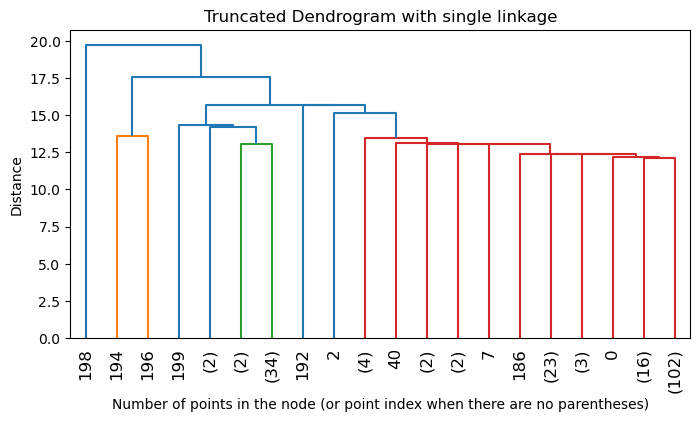

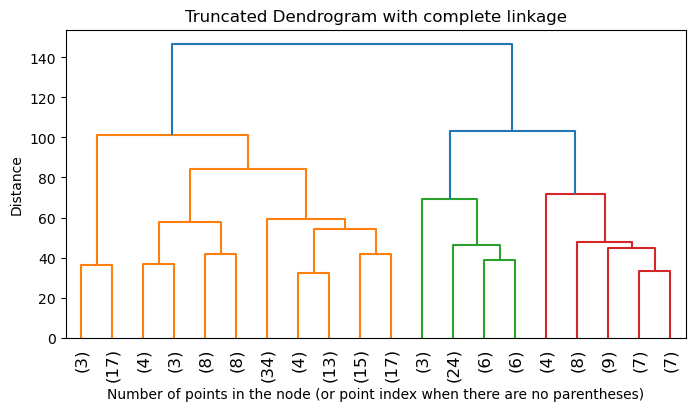

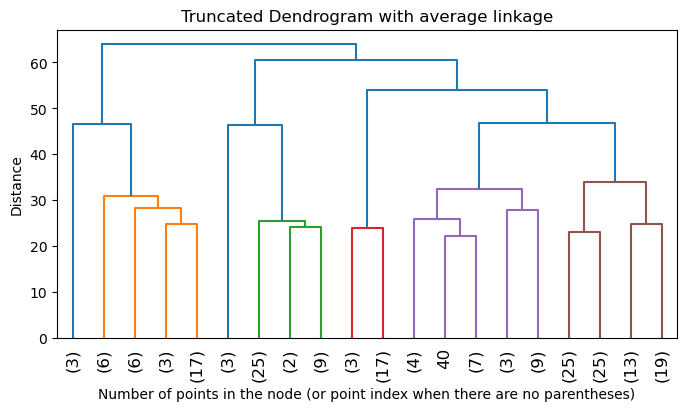

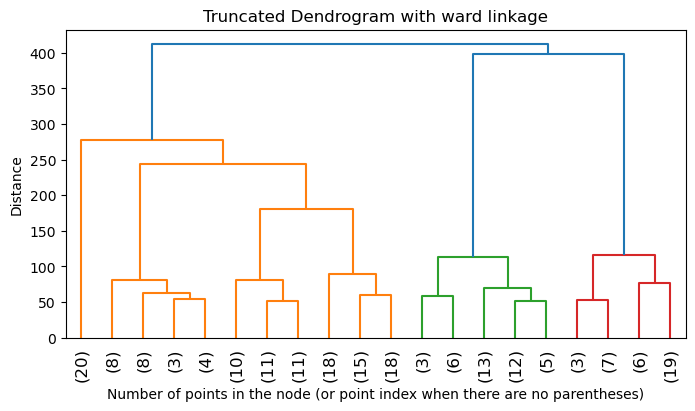

In [8]:
# truncated dendrogram with single linkage
plt.figure(figsize = (8, 4))
dendrogram(
    Z = dm_single,
    p = 20,
    truncate_mode = "lastp",
    leaf_rotation = 90.0
)
plt.title('Truncated Dendrogram with single linkage')
plt.xlabel('Number of points in the node (or point index when there are no parentheses)')
plt.ylabel('Distance')
plt.show()

# truncated dendrogram with complete linkage
plt.figure(figsize = (8, 4))
dendrogram(
    Z = dm_complete,
    p = 20,
    truncate_mode = "lastp",
    leaf_rotation = 90.0
)
plt.title('Truncated Dendrogram with complete linkage')
plt.xlabel('Number of points in the node (or point index when there are no parentheses)')
plt.ylabel('Distance')
plt.show()

# truncated dendrogram with average linkage
plt.figure(figsize = (8, 4))
dendrogram(
    Z = dm_average,
    p = 20,
    truncate_mode = "lastp",
    leaf_rotation = 90.0
)
plt.title('Truncated Dendrogram with average linkage')
plt.xlabel('Number of points in the node (or point index when there are no parentheses)')
plt.ylabel('Distance')
plt.show()

# truncated dendrogram with ward linkage
plt.figure(figsize = (8, 4))
dendrogram(
    Z = dm_ward,
    p = 20,
    truncate_mode = "lastp",
    leaf_rotation = 90.0
)
plt.title('Truncated Dendrogram with ward linkage')
plt.xlabel('Number of points in the node (or point index when there are no parentheses)')
plt.ylabel('Distance')
plt.show()

### Agglometative clustering with different types of linkage

We can use 'sklearn.cluster.AgglomerativeClustering' to perform agglometative clustering with different types of linkage.

In [9]:
# Agglomerative Clustering 
model_single = AgglomerativeClustering(n_clusters = 5, linkage = 'single').fit(X)
model_complete = AgglomerativeClustering(n_clusters = 5, linkage = 'complete').fit(X)
model_average = AgglomerativeClustering(n_clusters = 5, linkage = 'average').fit(X)
model_ward = AgglomerativeClustering(n_clusters = 5, linkage = 'ward').fit(X)

In [10]:
# obtain clustering results
labeled_df = df.copy()
labeled_df['Cluster Single'] = model_single.labels_
labeled_df['Cluster Complete'] = model_complete.labels_
labeled_df['Cluster Average'] = model_average.labels_
labeled_df['Cluster Ward'] = model_ward.labels_
labeled_df.head()

Age  Annual Income (k$)  Spending Score (1-100)  Cluster Single  \
CustomerID                                                                    
1            19                  15                      39               0   
2            21                  15                      81               0   
3            20                  16                       6               0   
4            23                  16                      77               0   
5            31                  17                      40               0   

            Cluster Complete  Cluster Average  Cluster Ward  
CustomerID                                                   
1                          4                4             4  
2                          3                3             3  
3                          4                4             4  
4                          3                3             3  
5                          4                4             4

In [11]:
# get centroids of each clusters
# use the single linkage result as example
labeled_df[list(labeled_df.columns[:-3])].groupby(by = 'Cluster Single').mean()

Age  Annual Income (k$)  Spending Score (1-100)
Cluster Single                                                       
0               40.369427           52.490446               43.101911
1               32.692308           86.538462               82.128205
2               46.000000          123.000000               22.000000
3               32.000000          137.000000               18.000000
4               33.000000          113.000000                8.000000

In [12]:
# display the 3D scatter plot for different results using different linkages
# Create a subplot figure with 2 rows and 2 columns
fig = make_subplots(
    rows = 2, cols = 2,
    specs = [
        [{'type': 'scatter3d'}, {'type': 'scatter3d'}],
        [{'type': 'scatter3d'}, {'type': 'scatter3d'}]
    ]
)

# Single-linkage subplot
fig.add_trace(
    go.Scatter3d(
        x = df['Annual Income (k$)'],
        y = df['Spending Score (1-100)'],
        z = df['Age'],
        mode = 'markers',
        marker = dict(size = 5, color = model_single.labels_, opacity = 0.8),
        name = 'Single Linkage'
    ),
    row = 1, col = 1
)

# Complete-linkage subplot
fig.add_trace(
    go.Scatter3d(
        x = df['Annual Income (k$)'],
        y = df['Spending Score (1-100)'],
        z = df['Age'],
        mode = 'markers',
        marker = dict(size = 5, color = model_complete.labels_, opacity = 0.8),
        name = 'Complete Linkage'
    ),
    row = 1, col = 2
)

# Average-linkage subplot
fig.add_trace(
    go.Scatter3d(
        x = df['Annual Income (k$)'],
        y = df['Spending Score (1-100)'],
        z = df['Age'],
        mode = 'markers',
        marker = dict(size = 5, color = model_average.labels_, opacity = 0.8),
        name = 'Average Linkage'
    ),
    row = 2, col = 1
)

# Ward-linkage subplot
fig.add_trace(
    go.Scatter3d(
        x = df['Annual Income (k$)'],
        y = df['Spending Score (1-100)'],
        z = df['Age'],
        mode = 'markers',
        marker = dict(size = 5, color = model_ward.labels_, opacity = 0.8),
        name = 'Ward Linkage'
    ),
    row = 2, col = 2
)

# Update layout
fig.update_layout(
    height = 800,
    width = 900,
    title_text = "Hierarchical Clustering with Different Linkage Methods"
)

# Show the figure
fig.show()

In [13]:
# calculate the clustering quality evaluation metric
metric_df = pd.DataFrame(
    columns = ['Silhouette Coefficient', 'Calinski-Harabasz Index', 'Davies-Bouldin index'],
    index = ['Single', 'Complete', 'Average', 'Ward']
)
metric_df['Silhouette Coefficient'] = [
    silhouette_score(X, model_single.labels_),
    silhouette_score(X, model_complete.labels_),
    silhouette_score(X, model_average.labels_),
    silhouette_score(X, model_ward.labels_)
]
metric_df['Calinski-Harabasz Index'] = [
    calinski_harabasz_score(X, model_single.labels_),
    calinski_harabasz_score(X, model_complete.labels_),
    calinski_harabasz_score(X, model_average.labels_),
    calinski_harabasz_score(X, model_ward.labels_)
]
metric_df['Davies-Bouldin index'] = [
    davies_bouldin_score(X, model_single.labels_),
    davies_bouldin_score(X, model_complete.labels_),
    davies_bouldin_score(X, model_average.labels_),
    davies_bouldin_score(X, model_ward.labels_)
]
metric_df

Silhouette Coefficient  Calinski-Harabasz Index  \
Single                  0.242942                25.859635   
Complete                0.440189               147.672413   
Average                 0.435421               146.613891   
Ward                    0.440189               147.672413   

          Davies-Bouldin index  
Single                0.631173  
Complete              0.821672  
Average               0.834278  
Ward                  0.821672

### Select the optimal distance threshold for agglomerative clustering

Let's use ward linkage as example.

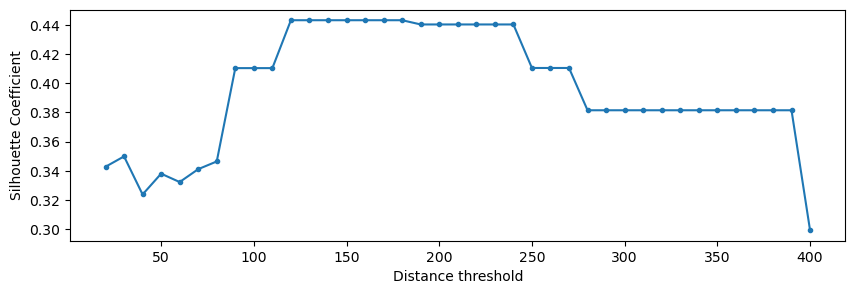

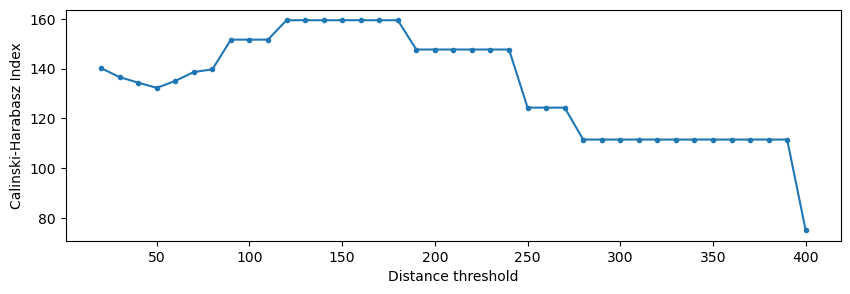

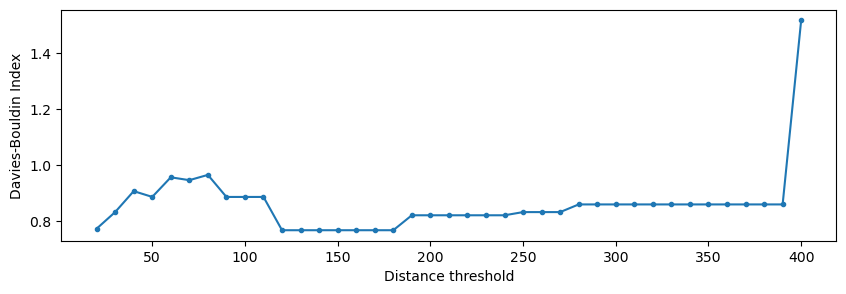

In [14]:
# create an empty list to store inertia
silhouette = []
calinski_harabasz = []
davies_bouldin = []

# test different number of clusters
for threshold in range(20, 401, 10):
    # ward linkage
    model_ward = AgglomerativeClustering(n_clusters = None, linkage = 'ward', distance_threshold = threshold).fit(X)
    silhouette.append(silhouette_score(X, model_ward.labels_))
    calinski_harabasz.append(calinski_harabasz_score(X, model_ward.labels_))
    davies_bouldin.append(davies_bouldin_score(X, model_ward.labels_))

plt.figure(figsize = (10, 3))
plt.plot(range(20,401,10), silhouette, '.-')
plt.xlabel('Distance threshold')
plt.ylabel('Silhouette Coefficient')
plt.show()

plt.figure(figsize = (10, 3))
plt.plot(range(20,401,10), calinski_harabasz, '.-')
plt.xlabel('Distance threshold')
plt.ylabel('Calinski-Harabasz Index')
plt.show()

plt.figure(figsize = (10, 3))
plt.plot(range(20,401,10), davies_bouldin, '.-')
plt.xlabel('Distance threshold')
plt.ylabel('Davies-Bouldin Index')
plt.show()

From the above figures, a distance threshold around 150 gives the best metric values.

In [15]:
# get the number of clusters when distance threshold = 150
model_ward = AgglomerativeClustering(n_clusters = None, linkage = 'ward', distance_threshold = 150).fit(X)
print("Number of clusters:", model_ward.n_clusters_)

Number of clusters: 6


### Select the optimal number of clusters instead of distance threshold

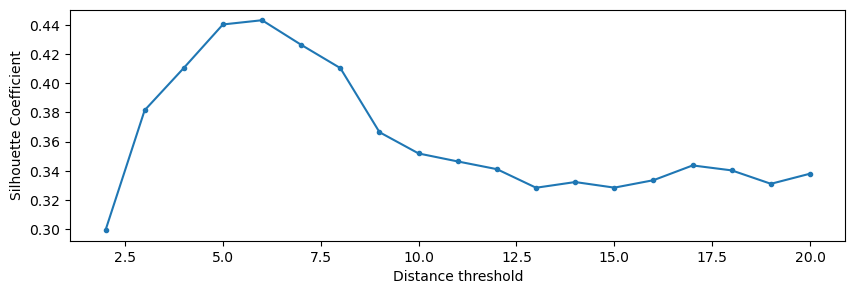

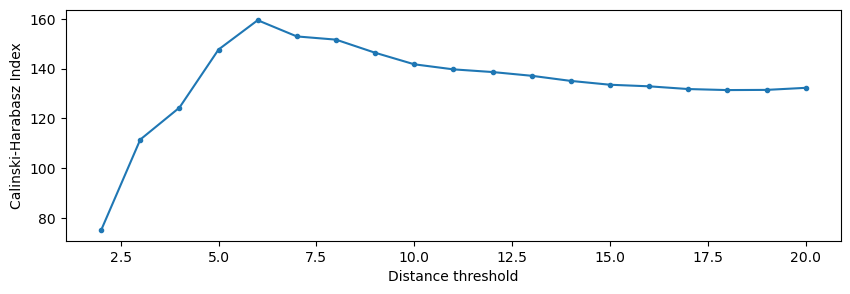

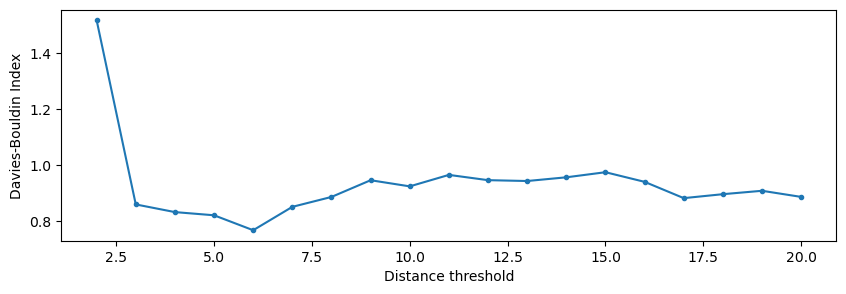

In [16]:
# create an empty list to store inertia
silhouette = []
calinski_harabasz = []
davies_bouldin = []

# test different number of clusters
for n in range(2, 21):
    # ward linkage
    model_ward = AgglomerativeClustering(n_clusters = n, linkage = 'ward').fit(X)
    silhouette.append(silhouette_score(X, model_ward.labels_))
    calinski_harabasz.append(calinski_harabasz_score(X, model_ward.labels_))
    davies_bouldin.append(davies_bouldin_score(X, model_ward.labels_))

plt.figure(figsize = (10, 3))
plt.plot(range(2, 21), silhouette, '.-')
plt.xlabel('Distance threshold')
plt.ylabel('Silhouette Coefficient')
plt.show()

plt.figure(figsize = (10, 3))
plt.plot(range(2, 21), calinski_harabasz, '.-')
plt.xlabel('Distance threshold')
plt.ylabel('Calinski-Harabasz Index')
plt.show()

plt.figure(figsize = (10, 3))
plt.plot(range(2, 21), davies_bouldin, '.-')
plt.xlabel('Distance threshold')
plt.ylabel('Davies-Bouldin Index')
plt.show()

The above figures also show that six is the optimal number of clusters.

## Part 2. Hands-on Exercise

In this exercise, we will perform hierarchical clustering with the [APP User Behavior dataset](https://www.kaggle.com/datasets/bhanupratapbiswas/app-users-segmentation-case-study). Please download `App_User_Behavior.csv` from the Learn platform.

This dataset records a list of features that characterize the user behavior when using an app.

We will perform clustering with this dataset to build a hierarchy of clusters among different users based on their behavior pattern.

### Task 1. Load and explore the dataset

<span style="color:red">**[TBC]**</span> Load the dataset and perform data exploration to see if there is a need for:
- Eliminate records with missing-values
- Eliminate highly correlated features
- Eliminate irrelevant / useless features
- Feature scaling
- Eliminate outliers

In [17]:
# [TBC] complete your code here with proper comments
# load the dataset
data_df = pd.read_csv('App_User_Behavior.csv')
data_df.head()

userid  Average Screen Time  Average Spent on App (INR)  Left Review  \
0    1001                 17.0                       634.0            1   
1    1002                  0.0                        54.0            0   
2    1003                 37.0                       207.0            0   
3    1004                 32.0                       445.0            1   
4    1005                 45.0                       427.0            1   

   Ratings  New Password Request  Last Visited Minutes       Status  
0        9                     7                  2990    Installed  
1        4                     8                 24008  Uninstalled  
2        8                     5                   971    Installed  
3        6                     2                   799    Installed  
4        5                     6                  3668    Installed

In [18]:
# [TBC] complete your code here with proper comments
# display the basic information
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   userid                      999 non-null    int64  
 1   Average Screen Time         999 non-null    float64
 2   Average Spent on App (INR)  999 non-null    float64
 3   Left Review                 999 non-null    int64  
 4   Ratings                     999 non-null    int64  
 5   New Password Request        999 non-null    int64  
 6   Last Visited Minutes        999 non-null    int64  
 7   Status                      999 non-null    object 
dtypes: float64(2), int64(5), object(1)
memory usage: 62.6+ KB


There is a non-numerical feature 'Status'. We need to further check what does 'Status' mean.

In [19]:
# [TBC] complete your code here with proper comments
# obtain the unique value of Status
print('Status:', data_df['Status'].unique())
print('Number of ' + data_df['Status'].unique()[0] + ':', sum(data_df['Status'] == data_df['Status'].unique()[0]))
print('Number of ' + data_df['Status'].unique()[1] + ':', sum(data_df['Status'] == data_df['Status'].unique()[1]))

Status: ['Installed' 'Uninstalled']
Number of Installed: 916
Number of Uninstalled: 83


'Status' is a binary variable, indicates whether the app is installed or not.

In [20]:
# [TBC] complete your code here with proper comments
# display the descriptive statistics of numeric variables
data_df.describe()

userid  Average Screen Time  Average Spent on App (INR)  \
count   999.000000           999.000000                  999.000000   
mean   1500.000000            24.390390                  424.415415   
std     288.530761            14.235415                  312.365695   
min    1001.000000             0.000000                    0.000000   
25%    1250.500000            12.000000                   96.000000   
50%    1500.000000            24.000000                  394.000000   
75%    1749.500000            36.000000                  717.500000   
max    1999.000000            50.000000                  998.000000   

       Left Review     Ratings  New Password Request  Last Visited Minutes  
count   999.000000  999.000000            999.000000            999.000000  
mean      0.497497    6.513514              4.941942           5110.898899  
std       0.500244    2.701511              2.784626           8592.036516  
min       0.000000    0.000000              1.000000            201.000000  
25%       0.000000    5.000000              3.000000           1495.500000  
50%       0.000000    7.000000              5.000000           2865.000000  
75%       1.000000    9.000000              7.000000           4198.000000  
max       1.000000   10.000000             15.000000          49715.000000

From the descriptive statistics, we can find another binary variable 'Left Review'. `0` represent that the user has never left a review. `1` represent that the user left a review.

In [21]:
# [TBC] complete your code here with proper comments
# obtain the numbers of users that left / didn't left review
print('Number of users that left review:', sum(data_df['Left Review'] == 1))
print('Number of users that didn\'t left review:', sum(data_df['Left Review'] == 0))

Number of users that left review: 497
Number of users that didn't left review: 502


There is a feature called 'userid', if this feature is the unique id for users, we can delete this feature.

In [22]:
# [TBC] complete your code here with proper comments
# obtain the number of unique user IDs
print('Number of unique user IDs:', len(data_df['userid'].unique()))

Number of unique user IDs: 999


'userid' is the unique id of users, we can delete it later.

In [23]:
# [TBC] complete your code here with proper comments
# display the correlation matrix between numeric variables
corr = data_df.corr(numeric_only = True)
corr.style.background_gradient(cmap = 'coolwarm')

There is no strong correlation between different features.

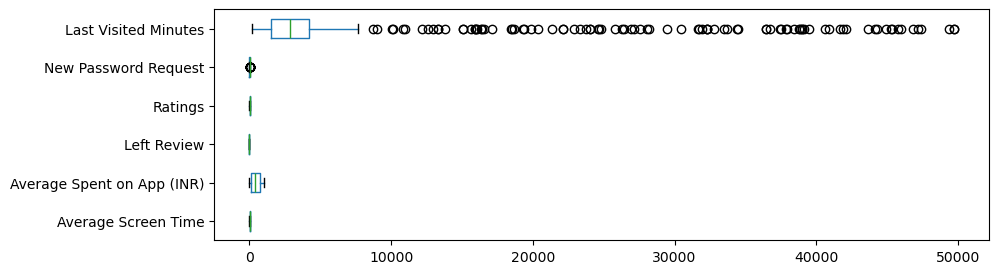

In [24]:
# [TBC] complete your code here with proper comments
# display the boxplot of the remained features
data_df.boxplot(
    column = list(data_df.columns[1: -1]),
    grid = False,
    figsize = (10, 3),
    vert = False
)
plt.show()

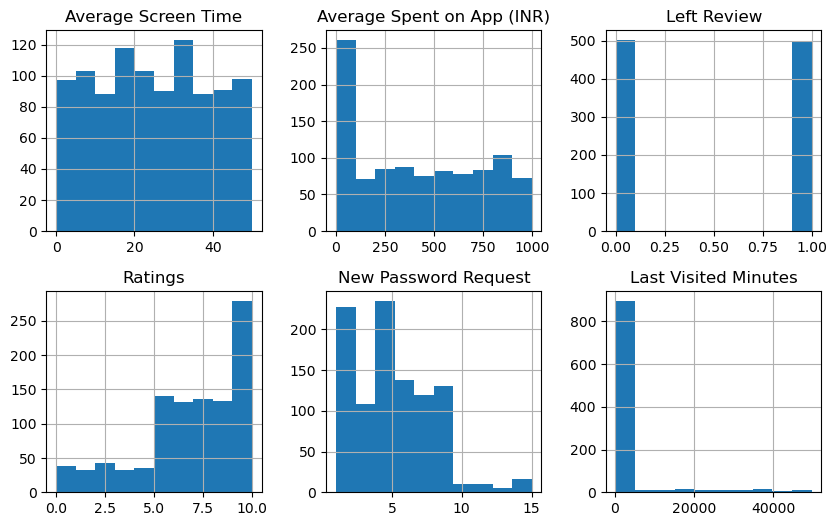

In [25]:
# [TBC] complete your code here with proper comments
# display histograms of different columns
data_df[list(data_df.columns[1: -1])].hist(figsize = (10, 6), layout = (2, 3))
plt.show()

The boxplots and histograms show that there are a lot of outliers regarding the feature 'Last Visited Minutes'. The scales of different features are also different.

### Task 2. Data pre-processing

<span style="color:red">**[TBC]**</span> Depending on the conclusions you got from data exploration, preproces the dataset.

In [26]:
# [TBC] complete your code here with proper comments
# set 'userid' as the index of the DataFrame
data_df.set_index(['userid'], inplace = True)
data_df.head()

Average Screen Time  Average Spent on App (INR)  Left Review  Ratings  \
userid                                                                          
1001                   17.0                       634.0            1        9   
1002                    0.0                        54.0            0        4   
1003                   37.0                       207.0            0        8   
1004                   32.0                       445.0            1        6   
1005                   45.0                       427.0            1        5   

        New Password Request  Last Visited Minutes       Status  
userid                                                           
1001                       7                  2990    Installed  
1002                       8                 24008  Uninstalled  
1003                       5                   971    Installed  
1004                       2                   799    Installed  
1005                       6                  3668    Installed

In [27]:
# [TBC] complete your code here with proper comments
# convert 'Status' into binary variables
data_df['Status'] = (data_df['Status'] == 'Installed').astype(int)
data_df.head()

Average Screen Time  Average Spent on App (INR)  Left Review  Ratings  \
userid                                                                          
1001                   17.0                       634.0            1        9   
1002                    0.0                        54.0            0        4   
1003                   37.0                       207.0            0        8   
1004                   32.0                       445.0            1        6   
1005                   45.0                       427.0            1        5   

        New Password Request  Last Visited Minutes  Status  
userid                                                      
1001                       7                  2990       1  
1002                       8                 24008       0  
1003                       5                   971       1  
1004                       2                   799       1  
1005                       6                  3668       1

In [28]:
# [TBC] complete your code here with proper comments
# delete outliers based on 'Last Visited Minutes'
mean = data_df['Last Visited Minutes'].mean()
std = data_df['Last Visited Minutes'].std()
preprocessed_data_df = data_df.copy()
preprocessed_data_df = preprocessed_data_df[
    (preprocessed_data_df['Last Visited Minutes'] > mean - 3 * std) &
    (preprocessed_data_df['Last Visited Minutes'] < mean + 3 * std)
]
print("The number of outliers that are eliminated:", len(data_df) - len(preprocessed_data_df))

The number of outliers that are eliminated: 44


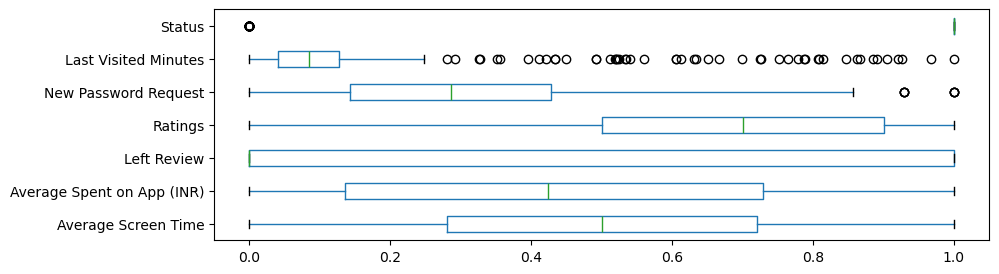

In [29]:
# [TBC] complete your code here with proper comments
# feature scaling
scaler = MinMaxScaler()

scaled_data_df = pd.DataFrame(
    scaler.fit_transform(preprocessed_data_df.values),
    columns = preprocessed_data_df.columns
)
scaled_data_df.boxplot(
    grid = False,
    figsize = (10, 3),
    vert = False
)
plt.show()

### Task 3. Create dendrogram with different types of linkage

<span style="color:red">**[TBC]**</span> Use `scipy` to create dendrogram with different types of linkage.

In [30]:
# [TBC] complete your code here with proper comments
# calculate the distance matrix using different linkage criteria
X = scaled_data_df.values
dm_single = linkage(X, method = 'single')
dm_complete = linkage(X, method = 'complete')
dm_average = linkage(X, method = 'average')
dm_ward = linkage(X, method = 'ward')

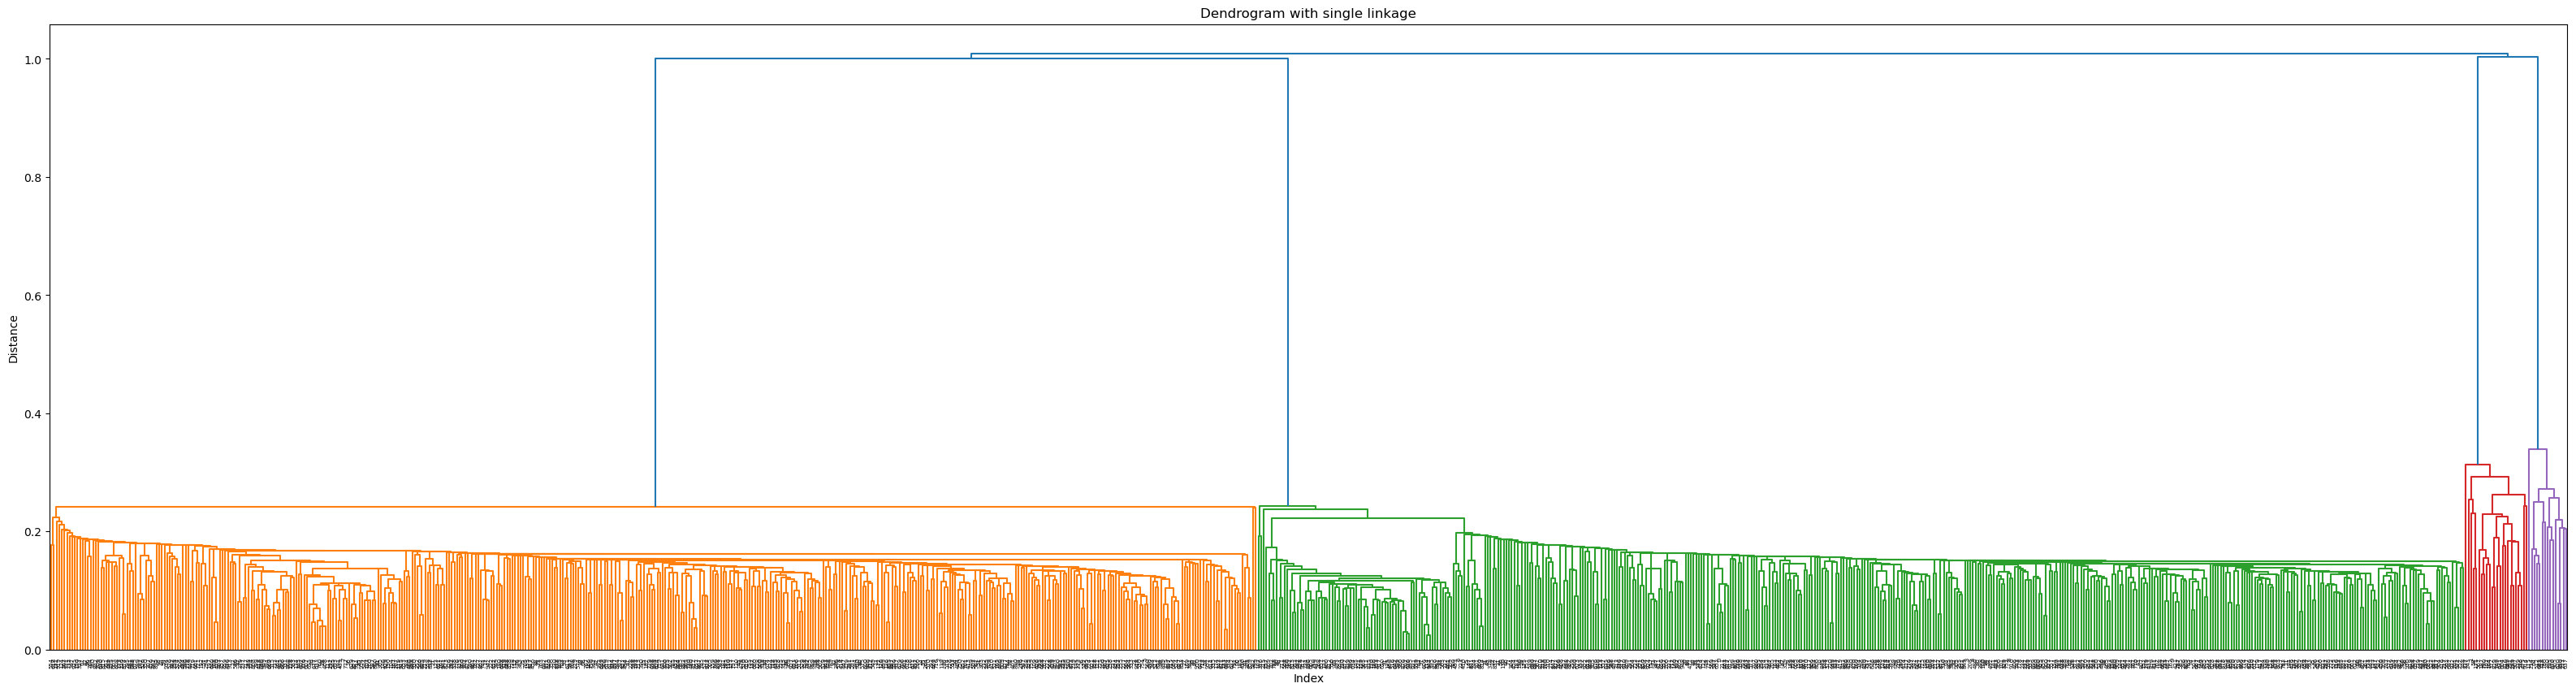

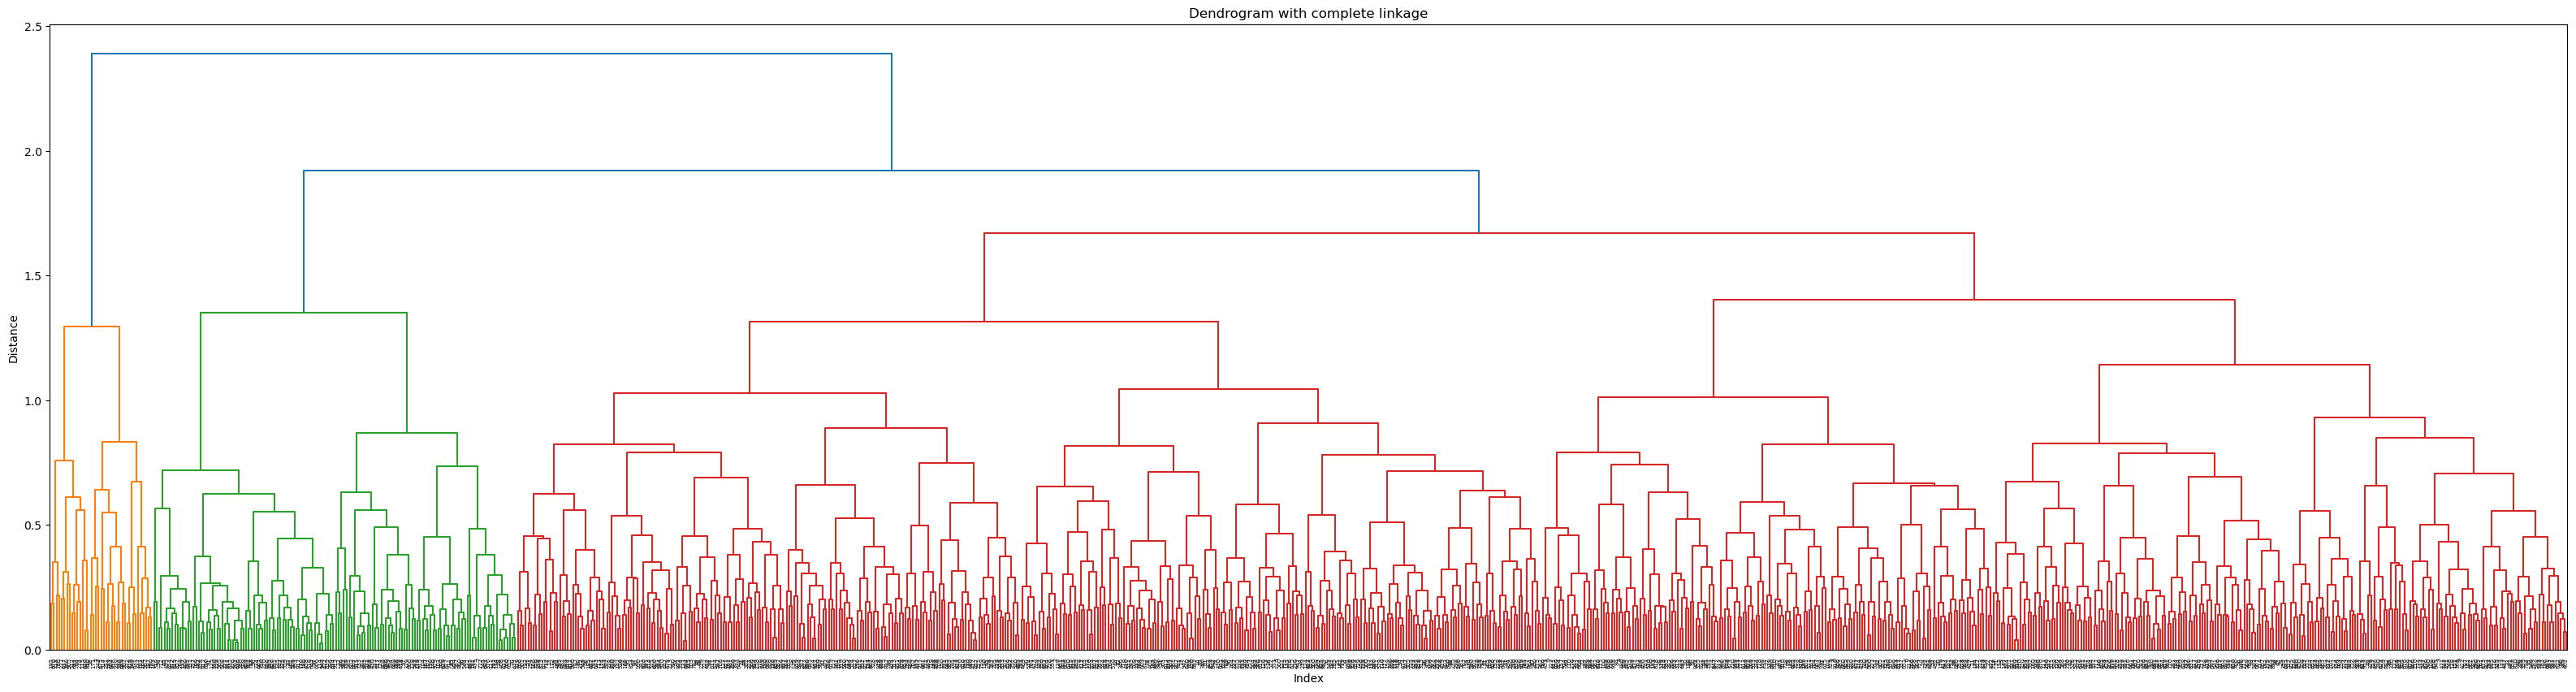

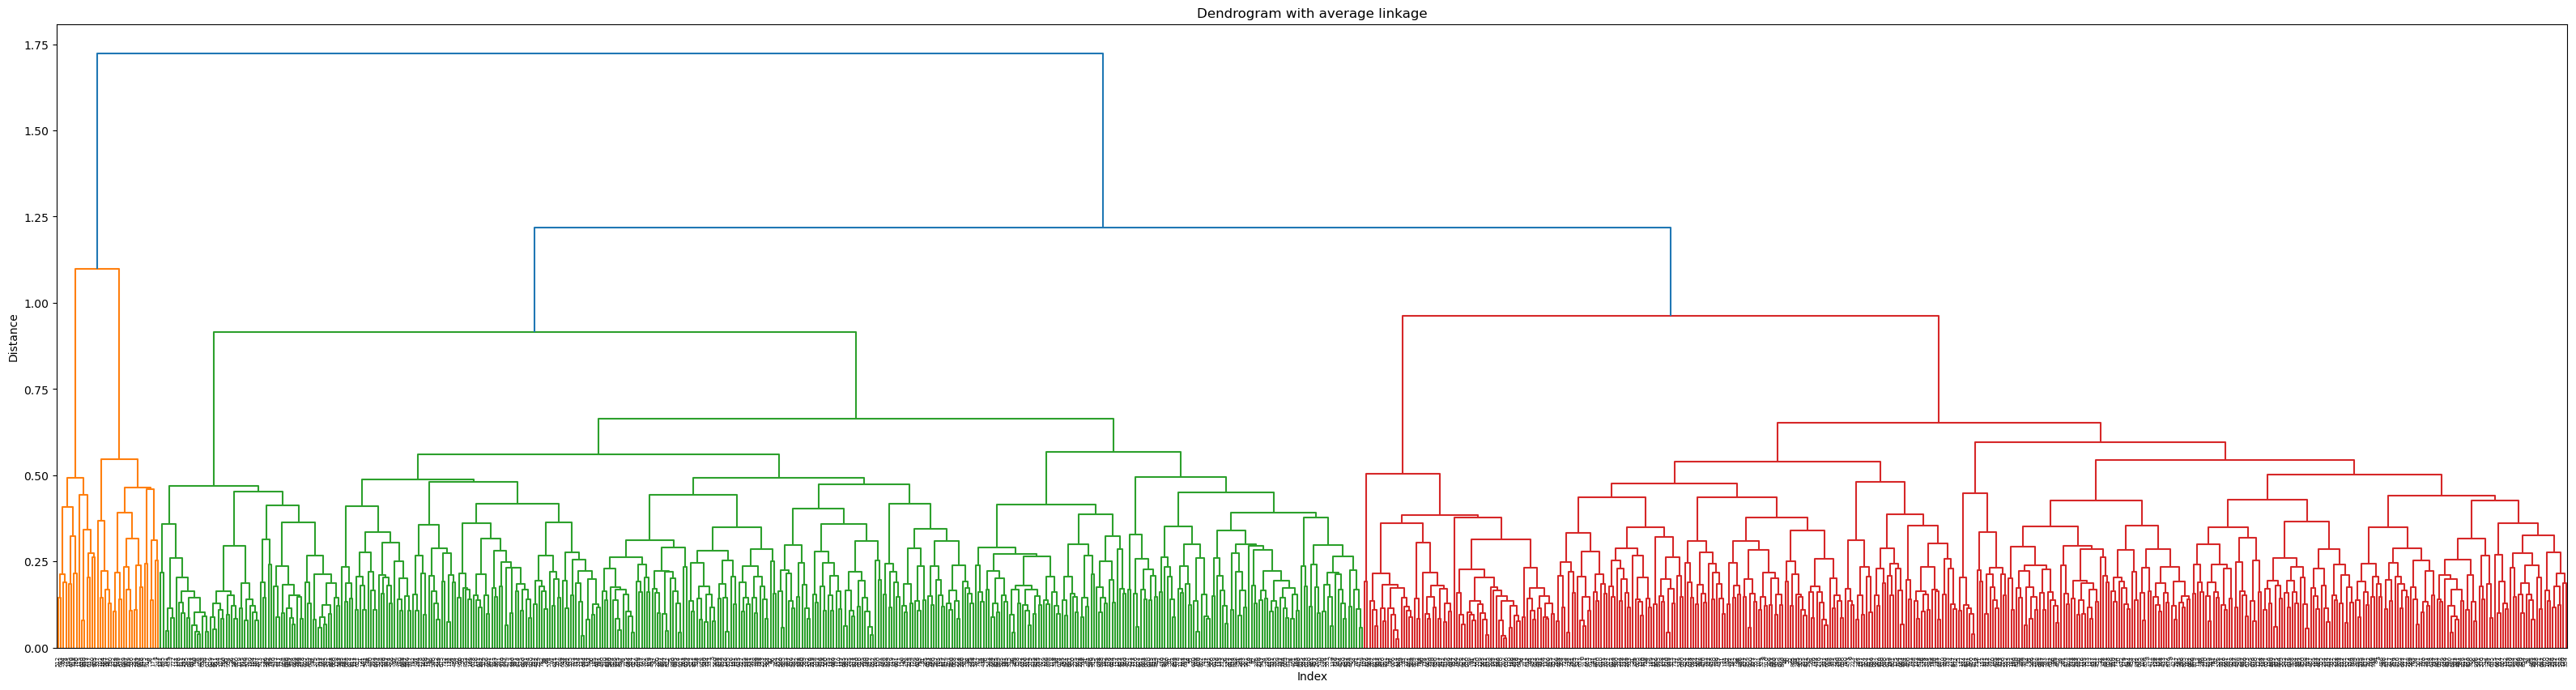

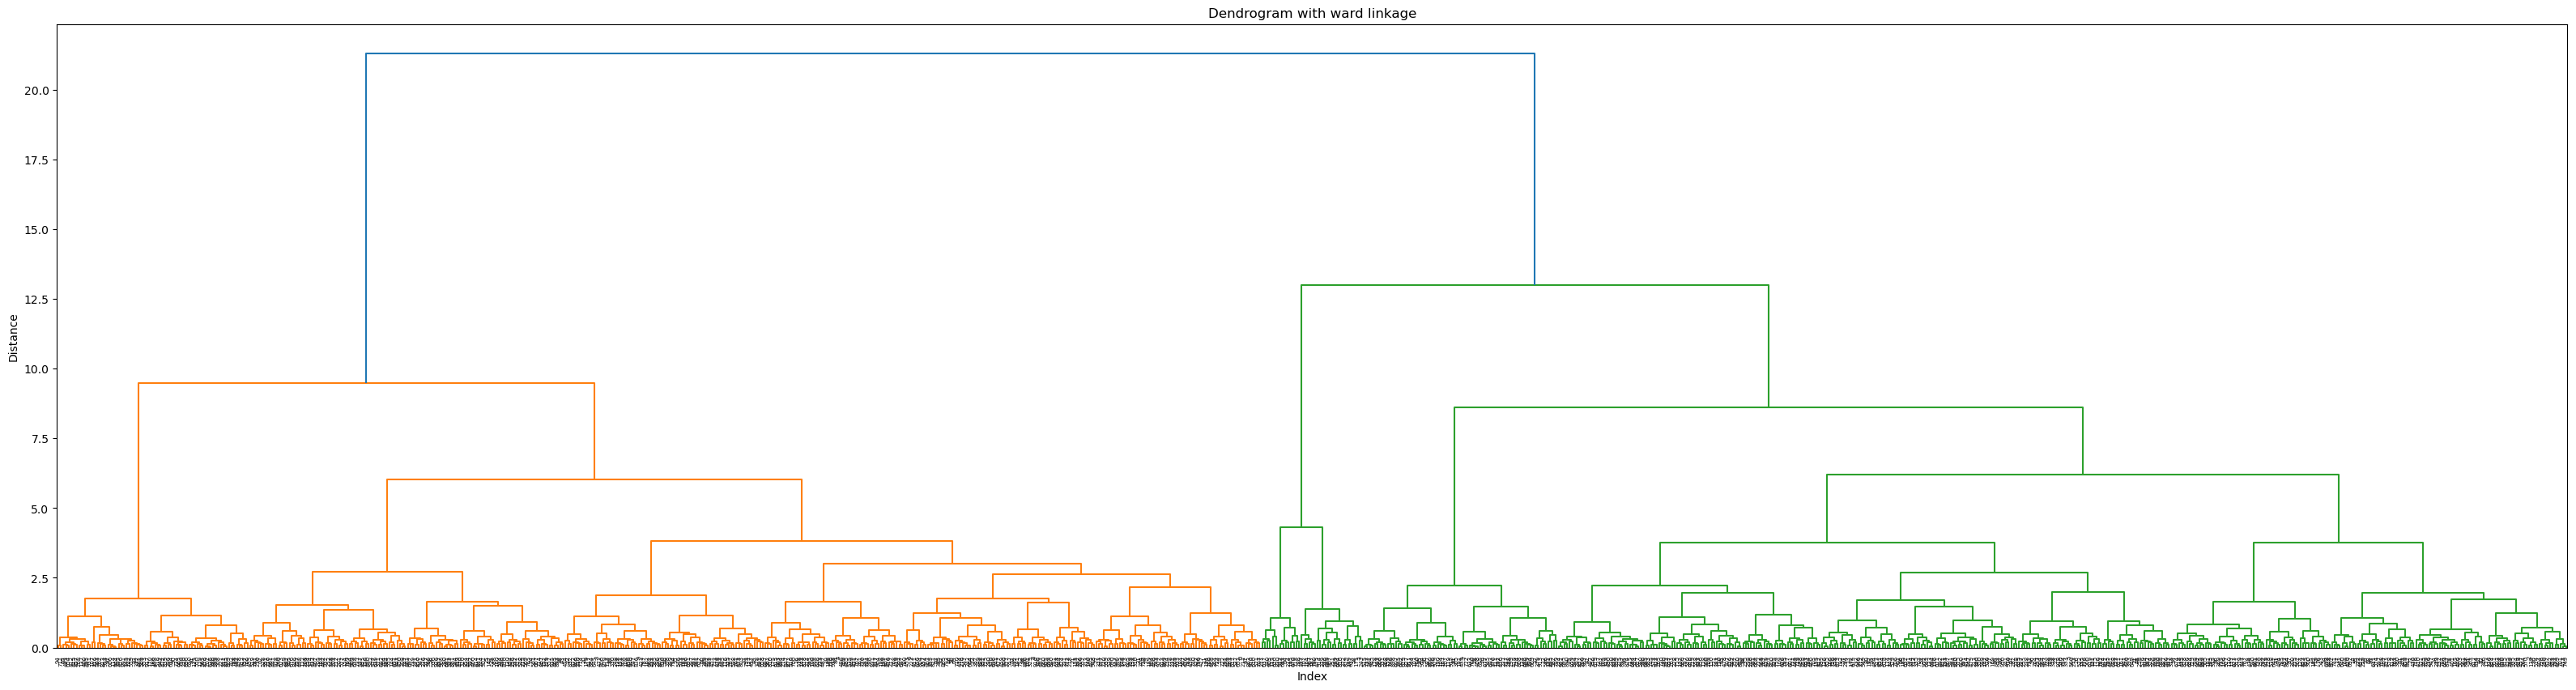

In [31]:
# [TBC] complete your code here with proper comments
# full dendrogram with single linkage
plt.figure(figsize = (40, 10))
dendrogram(Z = dm_single)
plt.title('Dendrogram with single linkage')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show()

# full dendrogram with complete linkage
plt.figure(figsize = (40, 10))
dendrogram(Z = dm_complete)
plt.title('Dendrogram with complete linkage')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show()

# full dendrogram with average linkage
plt.figure(figsize = (40, 10))
dendrogram(Z = dm_average)
plt.title('Dendrogram with average linkage')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show()

# full dendrogram with ward linkage
plt.figure(figsize = (40, 10))
dendrogram(Z = dm_ward)
plt.title('Dendrogram with ward linkage')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show()

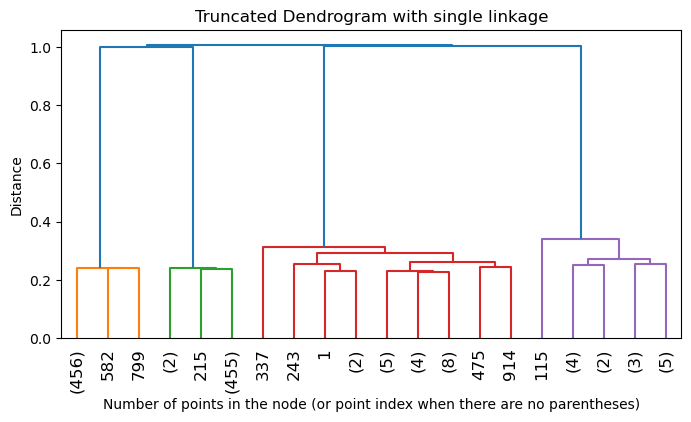

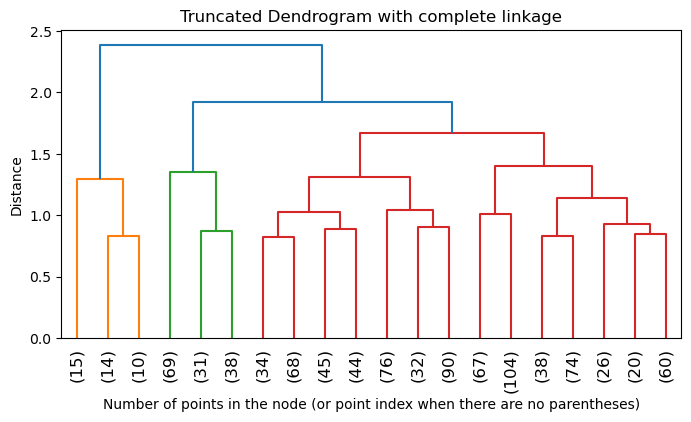

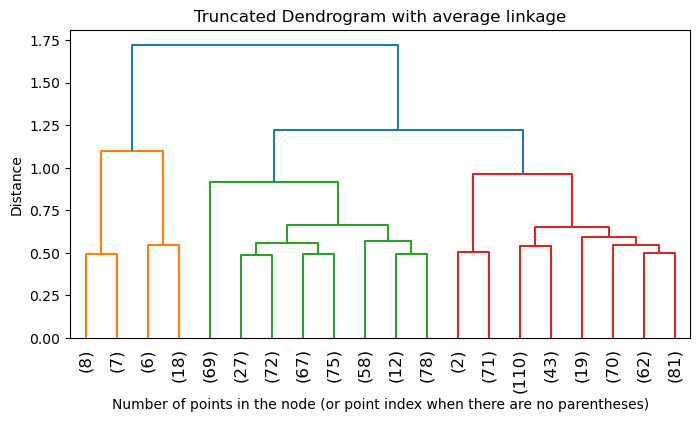

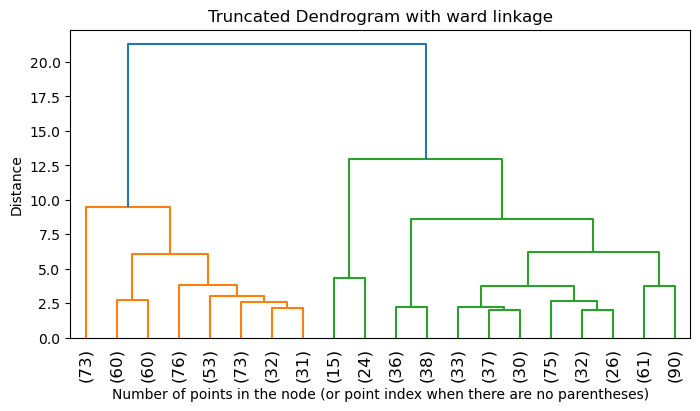

In [32]:
# [TBC] complete your code here with proper comments
# truncated dendrogram with single linkage
plt.figure(figsize = (8, 4))
dendrogram(
    Z = dm_single,
    p = 20,
    truncate_mode = "lastp",
    leaf_rotation = 90.0
)
plt.title('Truncated Dendrogram with single linkage')
plt.xlabel('Number of points in the node (or point index when there are no parentheses)')
plt.ylabel('Distance')
plt.show()

# truncated dendrogram with complete linkage
plt.figure(figsize = (8, 4))
dendrogram(
    Z = dm_complete,
    p = 20,
    truncate_mode = "lastp",
    leaf_rotation = 90.0
)
plt.title('Truncated Dendrogram with complete linkage')
plt.xlabel('Number of points in the node (or point index when there are no parentheses)')
plt.ylabel('Distance')
plt.show()

# truncated dendrogram with average linkage
plt.figure(figsize = (8, 4))
dendrogram(
    Z = dm_average,
    p = 20,
    truncate_mode = "lastp",
    leaf_rotation = 90.0
)
plt.title('Truncated Dendrogram with average linkage')
plt.xlabel('Number of points in the node (or point index when there are no parentheses)')
plt.ylabel('Distance')
plt.show()

# truncated dendrogram with ward linkage
plt.figure(figsize = (8, 4))
dendrogram(
    Z = dm_ward,
    p = 20,
    truncate_mode = "lastp",
    leaf_rotation = 90.0
)
plt.title('Truncated Dendrogram with ward linkage')
plt.xlabel('Number of points in the node (or point index when there are no parentheses)')
plt.ylabel('Distance')
plt.show()

### Task 4. Determine the number of clusters or the distance threshold for cutting the dendrogram

<span style="color:red">**[TBC]**</span> Determine the number of clusters or the distance threshold using multiple clustering quality evaluation metrics.

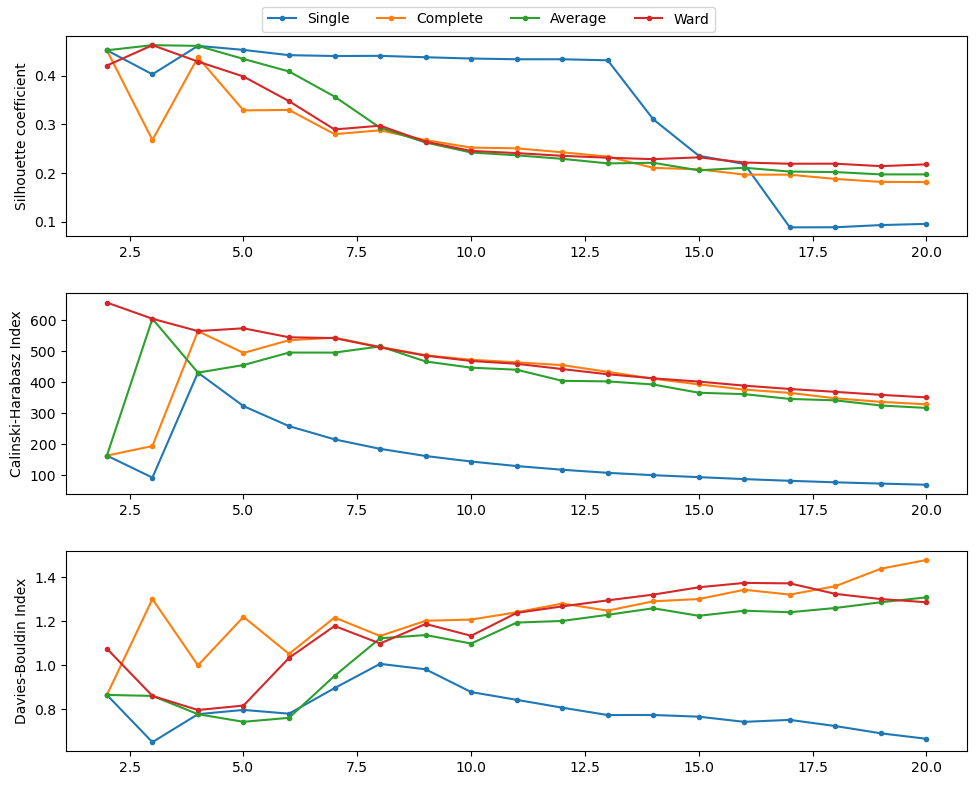

In [33]:
# [TBC] complete your code here with proper comments
# create an empty list to store inertia
silhouette = []
calinski_harabasz = []
davies_bouldin = []

# test different number of clusters
for n in range(2, 21):
    # single linkage
    model_single = AgglomerativeClustering(n_clusters = n, linkage = 'single').fit(X)
    silhouette.append(silhouette_score(X, model_single.labels_))
    calinski_harabasz.append(calinski_harabasz_score(X, model_single.labels_))
    davies_bouldin.append(davies_bouldin_score(X, model_single.labels_))
    # complete linkage
    model_complete = AgglomerativeClustering(n_clusters = n, linkage = 'complete').fit(X)
    silhouette.append(silhouette_score(X, model_complete.labels_))
    calinski_harabasz.append(calinski_harabasz_score(X, model_complete.labels_))
    davies_bouldin.append(davies_bouldin_score(X, model_complete.labels_))
    # average linkage
    model_average = AgglomerativeClustering(n_clusters = n, linkage = 'average').fit(X)
    silhouette.append(silhouette_score(X, model_average.labels_))
    calinski_harabasz.append(calinski_harabasz_score(X, model_average.labels_))
    davies_bouldin.append(davies_bouldin_score(X, model_average.labels_))
    # ward linkage
    model_ward = AgglomerativeClustering(n_clusters = n, linkage = 'ward').fit(X)
    silhouette.append(silhouette_score(X, model_ward.labels_))
    calinski_harabasz.append(calinski_harabasz_score(X, model_ward.labels_))
    davies_bouldin.append(davies_bouldin_score(X, model_ward.labels_))

# reformlize metrics
silhouette_df = pd.DataFrame(
    np.array(silhouette).reshape(-1, 4),
    columns = ['Single', 'Complete', 'Average', 'Ward'],
    index = np.arange(2, 21)
)
calinski_harabasz_df = pd.DataFrame(
    np.array(calinski_harabasz).reshape(-1, 4),
    columns = ['Single', 'Complete', 'Average', 'Ward'],
    index = np.arange(2, 21)
)
davies_bouldin_df = pd.DataFrame(
    np.array(davies_bouldin).reshape(-1, 4),
    columns = ['Single', 'Complete', 'Average', 'Ward'],
    index = np.arange(2, 21)
)

# plot number of clusters vs metrics
fig, axs = plt.subplots(nrows = 3, ncols = 1, figsize = (10, 8))
fig.tight_layout(pad = 2)
silhouette_df.plot(ax = axs[0], legend = False, ylabel = 'Silhouette coefficient', marker = '.')
calinski_harabasz_df.plot(ax = axs[1], legend = False, ylabel = 'Calinski-Harabasz Index', marker = '.')
davies_bouldin_df.plot(ax = axs[2], legend = False, ylabel = 'Davies-Bouldin Index', marker = '.')
fig.legend(['Single', 'Complete', 'Average', 'Ward'], loc = 'upper center', ncol = 4)
plt.show()

Select 4 as the number of clusters.

### Task 5. Use the optimal distance threshold or number of clusters to perform agglomerative clustering and interpret the results

<span style="color:red">**[TBC]**</span> Use the conclusion of Task 4 to perform agglomerative clustering, explain the results.

In [34]:
# [TBC] complete your code here with proper comments
# Agglomerative Clustering 
model_ward = AgglomerativeClustering(n_clusters = 4, linkage = 'ward').fit(X)

In [35]:
# [TBC] complete your code here with proper comments
# obtain clustering results
labeled_df = preprocessed_data_df.copy()
labeled_df['Cluster Ward'] = model_ward.labels_
labeled_df.head()

Average Screen Time  Average Spent on App (INR)  Left Review  Ratings  \
userid                                                                          
1001                   17.0                       634.0            1        9   
1002                    0.0                        54.0            0        4   
1003                   37.0                       207.0            0        8   
1004                   32.0                       445.0            1        6   
1005                   45.0                       427.0            1        5   

        New Password Request  Last Visited Minutes  Status  Cluster Ward  
userid                                                                    
1001                       7                  2990       1             1  
1002                       8                 24008       0             2  
1003                       5                   971       1             0  
1004                       2                   799       1             1  
1005                       6                  3668       1             1

In [36]:
# [TBC] complete your code here with proper comments
# obtaint the centroids
labeled_df.groupby(by = 'Cluster Ward').mean()

Average Screen Time  Average Spent on App (INR)  Left Review  \
Cluster Ward                                                                 
0                       26.820961                  467.096070     0.000000   
1                       29.628571                  526.792208     1.000000   
2                        2.102564                   50.897436     0.384615   
3                        6.657534                   40.109589     1.000000   

               Ratings  New Password Request  Last Visited Minutes  Status  
Cluster Ward                                                                
0             6.912664              4.325328           2709.744541     1.0  
1             7.683117              4.688312           2576.612987     1.0  
2             2.076923              9.769231          21654.000000     0.0  
3             2.356164              4.780822           3805.397260     1.0

There are 4 types of App users with different behavior patterns
- Cluster 0: Installed the app, use the app a lot, never left a review for this app, but gave high ratings
- Cluster 1: Installed the app, use the app a lot, left reviews for this app, and gave high ratings
- Cluster 2: Didn't installed the app, use the app occasionally, forget the passward frequently
- Cluster 3: Installed the app, use the app occasionally, left reviews with low ratings